## SPRING 2021
## Applied Machine Learning
### Practicum 3: Logistic regression. Solutions.

Download and pre-process the Iris flower data set by running the code cell below.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris_data=load_iris()
iris = pd.DataFrame(data=iris_data['data'], columns=[col[:-5] for col in iris_data['feature_names']])
iris['target']=iris_data['target']

In [3]:
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
y=(iris['target'].values==2).astype(int)

In [5]:
y.mean()

0.3333333333333333

In [6]:
cols=['petal length', 'petal width']
X=iris.loc[:, cols].values

In [7]:
X.shape

(150, 2)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
y_train.mean()

0.3333333333333333

In [10]:
y_test.mean()

0.3333333333333333

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
v_int=log_reg.intercept_[0]
v_int

-15.454922834450192

In [13]:
weights=log_reg.coef_[0]
weights

array([2.44812551, 2.02324314])

In [14]:
y_pred=log_reg.predict(X_test)

acc=(y_test == y_pred).mean()

print(f"The accuracy of the model is {acc:.5f}.")

The accuracy of the model is 0.95556.


In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9555555555555556

In [16]:
y_dumb = np.zeros(len(y_test))

In [17]:
accuracy_score(y_test, y_dumb)

0.6666666666666666

## Confusion matrix



In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 2, 13]])

In [19]:
confusion_matrix(y_test, y_dumb)

array([[30,  0],
       [15,  0]])

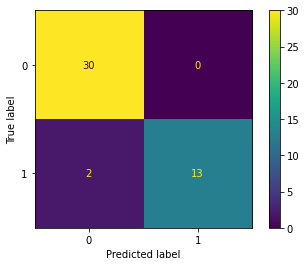

In [20]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()
#top right is false positives
#top left is true negatives
#bottom right is tue positives
#bottom left is false negatives

#precision formula = tp/tp+fp
#recall formula = tp/tp+fn

In [21]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

1.0

In [22]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.8666666666666667

In [23]:
log_reg.decision_function(X_test)

array([  3.61010552,  -1.3610051 ,   0.06538196, -10.88846084,
         0.1827298 ,   3.11036354, -11.86771105,  -3.03220472,
        -3.07469296,   1.68397647, -11.82522281, -11.62289849,
         2.38604276,   1.65160511, -11.13327339,   2.41841413,
        -0.91386824,  -5.35286552, -11.37808594, -11.58041026,
       -10.97343732,  -1.11619255,  -3.23452904,   3.19534002,
        -0.06208275, -12.1125236 ,  -2.29776707,  -3.47934159,
        -2.05295452,  -1.56332942,   1.08712041,   2.70571491,
       -10.2814879 ,  -2.54257962,   1.36430432,  -5.88497886,
        -1.40349334,  -4.86324042, -11.66538673,  -4.86324042,
        -0.42424314,  -1.85063021,  -0.99884471,   1.32181608,
        -1.40349334])

In [24]:
#lets predict on a single instance
#when t score is negative its classified as zero
#when t score is positive the classifier classifies a one.
x_new=np.array([[5, 1]])
log_reg.decision_function(x_new)

array([-1.19105215])

In [27]:
v_int
t_score = np.sum(weights*x_new[0,:]) + v_int
#we computed the t-score
print(t_score)

-1.191052153814983


In [30]:
p = log_reg.predict_proba(x_new)
#probabilty of class zero and class one
#first number is for class zero

In [31]:
pr = p[0,1]
pr

0.23307081171333982

In [33]:
import math
1/(1+math.exp(-t_score))

0.23307081171333982

In [ ]:
#parameters are subject to the threshold

In [34]:
prc, rc1, thr = precision_recall_curve(y_test,y_probas)

NameError: ignored